In [1]:
import pandas as pd
import numpy as np
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aragog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aragog\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('cleaned_dataset(range).csv')
df

,Unnamed: 0,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
0,3,Technical Support,Technical Support,Mumbai,"Admin,Maintenance,Security,Datawarehousing,IT ...",1 - 5,1 - 5
1,6,Sales- Fresher-for Leading Property Consultant,"channel partners, real estate, negotiation, p...",Bengaluru,"Retail Sales,Sales , Retail , Business Develop...",1 - 5,1 - 5
2,14,"Looking Facebook ,social Media Manager For ou...","digital marketing, seo, social media marketin...",Gurgaon,"Online,Digital Marketing,Marketing , Advertisi...",1 - 5,1 - 5
3,21,"Business Development , Corporate Sales","lead generation, business development, corpor...",Delhi NCR,"Retail Sales,Sales , Retail , Business Develop...",1 - 5,1 - 5
4,23,QA Executive,QA Executive,Hyderabad,"QA,Testing,Documentation,IT Software - QA & Te...",1 - 5,1 - 5
...,...,...,...,...,...,...,...
6793,392,"VP , Sr.vp Fire","Fire Safety, fire, Senior Management",Delhi NCR,"Safety,Health,Environment,Production , Manufac...",20 - 25,50 - 100
6794,4917,Vice President - Marketing Startegies,"Life Cycle, Portfolio Management, New Product...",Mumbai,"Senior Management,Marketing , Advertising , MR...",20 - 25,50 - 100
6795,9109,VP Finance,"financial institution, mis, income tax, conso...",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",20 - 25,50 - 100
6796,10908,Product Architect,"Product Development, Design Development, Indu...","Delhi NCR,Gurgaon","Telecom,IT Hardware , Technical Support , Tele...",20 - 25,50 - 100


In [5]:
df['Job_Salary'].value_counts()

1 - 5       4197
5 - 10      1370
10 - 25     1086
25 - 50      125
50 - 100      20
Name: Job_Salary, dtype: int64

In [6]:
le = LabelEncoder()
df['Job_Salary'] = le.fit_transform(df['Job_Salary'])
df['Job_Experience'] = le.fit_transform(df['Job_Experience'])

In [7]:
df

,Unnamed: 0,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
0,3,Technical Support,Technical Support,Mumbai,"Admin,Maintenance,Security,Datawarehousing,IT ...",0,0
1,6,Sales- Fresher-for Leading Property Consultant,"channel partners, real estate, negotiation, p...",Bengaluru,"Retail Sales,Sales , Retail , Business Develop...",0,0
2,14,"Looking Facebook ,social Media Manager For ou...","digital marketing, seo, social media marketin...",Gurgaon,"Online,Digital Marketing,Marketing , Advertisi...",0,0
3,21,"Business Development , Corporate Sales","lead generation, business development, corpor...",Delhi NCR,"Retail Sales,Sales , Retail , Business Develop...",0,0
4,23,QA Executive,QA Executive,Hyderabad,"QA,Testing,Documentation,IT Software - QA & Te...",0,0
...,...,...,...,...,...,...,...
6793,392,"VP , Sr.vp Fire","Fire Safety, fire, Senior Management",Delhi NCR,"Safety,Health,Environment,Production , Manufac...",3,4
6794,4917,Vice President - Marketing Startegies,"Life Cycle, Portfolio Management, New Product...",Mumbai,"Senior Management,Marketing , Advertising , MR...",3,4
6795,9109,VP Finance,"financial institution, mis, income tax, conso...",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",3,4
6796,10908,Product Architect,"Product Development, Design Development, Indu...","Delhi NCR,Gurgaon","Telecom,IT Hardware , Technical Support , Tele...",3,4


In [8]:
df['Job_Salary'].value_counts()

0    4197
3    1370
1    1086
2     125
4      20
Name: Job_Salary, dtype: int64

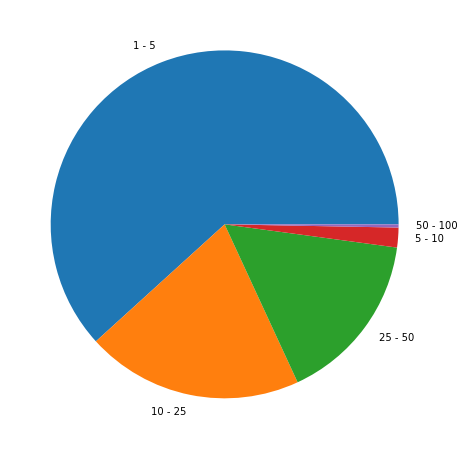

In [9]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Job_Salary'].value_counts(),labels=["1 - 5","10 - 25","25 - 50","5 - 10","50 - 100"])
plt.show()

In [10]:

class_0  = df[df['Job_Salary']==0]
class_1   = df[df['Job_Salary']==1]
class_2  = df[df['Job_Salary']==2]
class_3   = df[df['Job_Salary']==3]
class_4  = df[df['Job_Salary']==4]

print('class_0  :',class_0.shape)
print('class_1  :',class_1.shape)
print('class_2  :',class_2.shape)
print('class_3  :',class_3.shape)
print('class_4  :',class_4.shape)


class_0  : (4197, 7)
class_1  : (1086, 7)
class_2  : (125, 7)
class_3  : (1370, 7)
class_4  : (20, 7)


In [11]:
class_1_over = class_1.sample(n=4197,random_state=15,replace=True)
class_2_over = class_2.sample(n=4197,random_state=15,replace=True)
class_3_over = class_3.sample(n=4197,random_state=15,replace=True)
class_4_over = class_4.sample(n=4197,random_state=15,replace=True)
final_data = pd.concat([class_1_over,class_2_over,class_3_over,class_4_over,class_0],axis=0)

In [12]:
df = final_data.drop(["Unnamed: 0"],axis =1)

In [13]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6212,HCL Technologies is Hiring For Data Scientist...,"deep learning, data management, data science,...","Delhi NCR,Noida","Programming & Design,IT Software - Application...",5,1
5951,"Aws,azure Technical Lead","Database Administration, Architectural Design...",Gurgaon,"Programming & Design,IT Software - Application...",5,1
5723,Senior Associate- Merger and Accquisition-tax...,"ACQUISITION, taxation, MERGER",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",5,1
6234,City Manager with a Top Retail Brand- Mumbai,"Team Management, Visual Merchandising, Invent...",Mumbai,"Channel Sales,Sales , Retail , Business Develo...",5,1
5652,Company Secretary For Pitampura,"Company Secretary, Secretarial Activities, Ch...",Delhi NCR,"Senior Management,Accounts , Finance , Tax , C...",0,1
...,...,...,...,...,...,...
4192,Business Development Manager & BDO - All Indi...,"area manager, Sales & Distribution, business ...","Delhi NCR,Bengaluru,Ludhiana","Channel Sales,Sales , Retail , Business Develo...",2,0
4193,Urgent Walk Ins For Sales Executive - Kolkata...,"insurance, pharma sales, auto sales, business...","Kolkata,Guwahati,Ranchi","Retail Sales,Sales , Retail , Business Develop...",2,0
4194,"Highway Engineer, Highway Design Engineer, Br...","Bridge Design, Highway Design, Highway Engine...",Delhi NCR,"Site Engineering,Site Engineering , Project Ma...",3,0
4195,Job Opening ::raitan Pvt. Ltd. :: Accounts &a...,"accounts executive, admin assistant, administ...",Chennai,"Accounts,Accounts , Finance , Tax , Company Se...",3,0


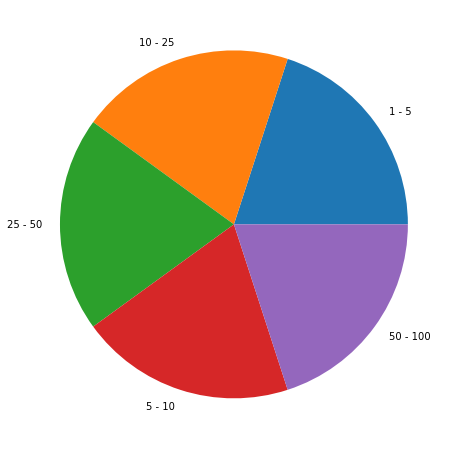

In [14]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Job_Salary'].value_counts(),labels=["1 - 5","10 - 25","25 - 50","5 - 10","50 - 100"])
plt.show()

In [15]:
df["Job_Title"] = df["Job_Title"].str.lower()
df["Key_Skills"] = df["Key_Skills"].str.lower()
df["Functional_Area_merged"] = df["Functional_Area_merged"].str.lower()
df["Location1"] = df["Location1"].str.lower()


In [16]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6212,hcl technologies is hiring for data scientist...,"deep learning, data management, data science,...","delhi ncr,noida","programming & design,it software - application...",5,1
5951,"aws,azure technical lead","database administration, architectural design...",gurgaon,"programming & design,it software - application...",5,1
5723,senior associate- merger and accquisition-tax...,"acquisition, taxation, merger",gurgaon,"senior management,accounts , finance , tax , c...",5,1
6234,city manager with a top retail brand- mumbai,"team management, visual merchandising, invent...",mumbai,"channel sales,sales , retail , business develo...",5,1
5652,company secretary for pitampura,"company secretary, secretarial activities, ch...",delhi ncr,"senior management,accounts , finance , tax , c...",0,1
...,...,...,...,...,...,...
4192,business development manager & bdo - all indi...,"area manager, sales & distribution, business ...","delhi ncr,bengaluru,ludhiana","channel sales,sales , retail , business develo...",2,0
4193,urgent walk ins for sales executive - kolkata...,"insurance, pharma sales, auto sales, business...","kolkata,guwahati,ranchi","retail sales,sales , retail , business develop...",2,0
4194,"highway engineer, highway design engineer, br...","bridge design, highway design, highway engine...",delhi ncr,"site engineering,site engineering , project ma...",3,0
4195,job opening ::raitan pvt. ltd. :: accounts &a...,"accounts executive, admin assistant, administ...",chennai,"accounts,accounts , finance , tax , company se...",3,0


In [17]:
df.describe()

,Job_Experience,Job_Salary
count,20985.000000,20985.000000
mean,2.204098,2.000000
std,2.005222,1.414247
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,2.000000
75%,5.000000,3.000000
max,5.000000,4.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20985 entries, 6212 to 4196
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job_Title               20985 non-null  object
 1   Key_Skills              20985 non-null  object
 2   Location1               20985 non-null  object
 3   Functional_Area_merged  20985 non-null  object
 4   Job_Experience          20985 non-null  int32 
 5   Job_Salary              20985 non-null  int32 
dtypes: int32(2), object(4)
memory usage: 983.7+ KB


Tokenization of Data

In [19]:
# from nltk.tokenize import word_tokenize

def word_tok(data):
    tokens = re.findall("[\w']+", data)
#     print(tokens)
    return tokens

Removal of Stopwords

In [20]:
def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
#     print(new_list)
    return new_list

Removal of Punctuation Symbols

In [21]:
def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list

Removal of Numbers

In [22]:
def remove_number(data):
    no_digit_list = []
    new_list = []
    
    for i in data:
        for j in s.digits:
            i = i.replace(j,'')
        no_digit_list.append(i)
    
    for i in no_digit_list:
        if i!='':
            new_list.append(i)
    return new_list

Lemmatization of Data

In [23]:
def lemmatization(data):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    roots = [lemmatizer.lemmatize(i) for i in data]
    return roots

In [24]:
# Job Title
df["Job_Title"] = df["Job_Title"].apply(word_tok)
df["Job_Title"] = df["Job_Title"].apply(remove_stopwords)
df["Job_Title"] = df["Job_Title"].apply(remove_punctuations)
df["Job_Title"] = df["Job_Title"].apply(remove_number)
df["Job_Title"] = df["Job_Title"].apply(lemmatization)

In [25]:
df['Job_Title'] = [' '.join(map(str,l)) for l in df['Job_Title']] 

In [26]:
# Key Skills
df["Key_Skills"] = df["Key_Skills"].apply(word_tok)
df["Key_Skills"] = df["Key_Skills"].apply(remove_stopwords)
df["Key_Skills"] = df["Key_Skills"].apply(remove_punctuations)
df["Key_Skills"] = df["Key_Skills"].apply(remove_number)
df["Key_Skills"] = df["Key_Skills"].apply(lemmatization)

In [27]:
df['Key_Skills'] = [' '.join(map(str,l)) for l in df['Key_Skills']] 

In [28]:
# Role Category
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(word_tok)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_stopwords)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_punctuations)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_number)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(lemmatization)

In [29]:
df['Functional_Area_merged'] = [' '.join(map(str,l)) for l in df['Functional_Area_merged']] 

In [30]:
# Location
df["Location1"] = df["Location1"].apply(word_tok)
df["Location1"] = df["Location1"].apply(remove_stopwords)
df["Location1"] = df["Location1"].apply(remove_punctuations)
df["Location1"] = df["Location1"].apply(remove_number)
df["Location1"] = df["Location1"].apply(lemmatization)

In [31]:
df['Location1'] = [' '.join(map(str,l)) for l in df['Location1']] 

In [32]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6212,hcl technology hiring data scientist position ...,deep learning data management data science nat...,delhi ncr noida,programming design software application progra...,5,1
5951,aws azure technical lead,database administration architectural design t...,gurgaon,programming design software application progra...,5,1
5723,senior associate merger accquisition taxation,acquisition taxation merger,gurgaon,senior management account finance tax company ...,5,1
6234,city manager top retail brand mumbai,team management visual merchandising inventory...,mumbai,channel sale sale retail business development ...,5,1
5652,company secretary pitampura,company secretary secretarial activity charter...,delhi ncr,senior management account finance tax company ...,0,1
...,...,...,...,...,...,...
4192,business development manager bdo india vacancy,area manager sale distribution business manage...,delhi ncr bengaluru ludhiana,channel sale sale retail business development ...,2,0
4193,urgent walk in sale executive kolkata bhubnesh...,insurance pharma sale auto sale business devel...,kolkata guwahati ranchi,retail sale sale retail business development i...,2,0
4194,highway engineer highway design engineer bridg...,bridge design highway design highway engineeri...,delhi ncr,site engineering site engineering project mana...,3,0
4195,job opening raitan pvt ltd account admin ex ch...,account executive admin assistant administrati...,chennai,account account finance tax company secretary ...,3,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20985 entries, 6212 to 4196
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job_Title               20985 non-null  object
 1   Key_Skills              20985 non-null  object
 2   Location1               20985 non-null  object
 3   Functional_Area_merged  20985 non-null  object
 4   Job_Experience          20985 non-null  int32 
 5   Job_Salary              20985 non-null  int32 
dtypes: int32(2), object(4)
memory usage: 983.7+ KB


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
x_train = df.drop(["Job_Salary"],axis =1)

In [36]:
x_train

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience
6212,hcl technology hiring data scientist position ...,deep learning data management data science nat...,delhi ncr noida,programming design software application progra...,5
5951,aws azure technical lead,database administration architectural design t...,gurgaon,programming design software application progra...,5
5723,senior associate merger accquisition taxation,acquisition taxation merger,gurgaon,senior management account finance tax company ...,5
6234,city manager top retail brand mumbai,team management visual merchandising inventory...,mumbai,channel sale sale retail business development ...,5
5652,company secretary pitampura,company secretary secretarial activity charter...,delhi ncr,senior management account finance tax company ...,0
...,...,...,...,...,...
4192,business development manager bdo india vacancy,area manager sale distribution business manage...,delhi ncr bengaluru ludhiana,channel sale sale retail business development ...,2
4193,urgent walk in sale executive kolkata bhubnesh...,insurance pharma sale auto sale business devel...,kolkata guwahati ranchi,retail sale sale retail business development i...,2
4194,highway engineer highway design engineer bridg...,bridge design highway design highway engineeri...,delhi ncr,site engineering site engineering project mana...,3
4195,job opening raitan pvt ltd account admin ex ch...,account executive admin assistant administrati...,chennai,account account finance tax company secretary ...,3


In [37]:
y_train = df["Job_Salary"].astype(int)

In [38]:
y_train

6212    1
5951    1
5723    1
6234    1
5652    1
       ..
4192    0
4193    0
4194    0
4195    0
4196    0
Name: Job_Salary, Length: 20985, dtype: int32

In [39]:
y_train = pd.DataFrame(y_train)
y_train

,Job_Salary
6212,1
5951,1
5723,1
6234,1
5652,1
...,...
4192,0
4193,0
4194,0
4195,0


In [40]:
tfidf = TfidfVectorizer()


In [41]:
tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Job_Title = tfidf.fit_transform(x_train["Job_Title"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Key_Skills = tfidf.fit_transform(x_train["Key_Skills"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Functional_Area_merged = tfidf.fit_transform(x_train["Functional_Area_merged"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Location1 = tfidf.fit_transform(x_train["Location1"].tolist())



In [42]:
import scipy
X = scipy.sparse.hstack((X_Job_Title, 
                         X_Key_Skills,
                         X_Functional_Area_merged,
                         X_Location1,
                        x_train[["Job_Experience"]].to_numpy())).tocsr()

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y_train,test_size = 0.33, random_state = 1)

In [44]:
X_train.shape

(14059, 2001)

In [45]:
Y_train.shape

(14059, 1)

In [46]:
X_test.shape

(6926, 2001)

In [47]:
Y_test.shape

(6926, 1)

These are the models we are testing for our prediction
1. LogisticRegression
2.DecisionTreeClassifier
3.RandomForestClassifier
4.AdaBoostClassifier
5.GradientBoostingClassifier
6.XGBClassifier
7.LGBMClassifier
8.KNeighborsClassifier


1. LogisticRegression

In [48]:
%%time
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

Wall time: 2.61 s


LogisticRegression()

In [49]:
logistic_pred_train = logistic_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,logistic_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,logistic_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,logistic_pred_train))
print('Classification Report          :\n',classification_report(Y_train,logistic_pred_train))

Accuracy Score                 : 0.8816
Precision Score                : 0.8816
Recall Score                   : 0.8816
Confusion Matrix               :
 [[2411   93   19  302    0]
 [  81 2299   84  311    0]
 [   0    0 2791   16    0]
 [ 331  385   43 2053    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2825
           1       0.83      0.83      0.83      2775
           2       0.95      0.99      0.97      2807
           3       0.77      0.73      0.75      2812
           4       1.00      1.00      1.00      2840

    accuracy                           0.88     14059
   macro avg       0.88      0.88      0.88     14059
weighted avg       0.88      0.88      0.88     14059



In [50]:
logistic_pred_test = logistic_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,logistic_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,logistic_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,logistic_pred_test))
print('Classification Report          :\n',classification_report(Y_test,logistic_pred_test))

Accuracy Score                 : 0.829
Precision Score                : 0.829
Recall Score                   : 0.829
Confusion Matrix               :
 [[1108   57   18  189    0]
 [  68 1060   69  225    0]
 [   0    0 1374   16    0]
 [ 227  274   41  843    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1372
           1       0.76      0.75      0.75      1422
           2       0.91      0.99      0.95      1390
           3       0.66      0.61      0.63      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.83      6926
   macro avg       0.83      0.83      0.83      6926
weighted avg       0.82      0.83      0.83      6926



2.DecisionTreeClassifier

In [51]:
%%time
dt_model = DecisionTreeClassifier(random_state=15,max_depth=57)
dt_model.fit(X_train,Y_train)

Wall time: 2.08 s


DecisionTreeClassifier(max_depth=57, random_state=15)

In [52]:
dt_pred_train = dt_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,dt_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,dt_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,dt_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,dt_pred_train))
print('Classification Report          :\n',classification_report(Y_train,dt_pred_train))


Accuracy Score                 : 0.992
Precision Score                : 0.992
Recall Score                   : 0.992
Confusion Matrix               :
 [[2789    1    0   35    0]
 [   3 2741    0   31    0]
 [   0    0 2807    0    0]
 [  35    7    0 2770    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2825
           1       1.00      0.99      0.99      2775
           2       1.00      1.00      1.00      2807
           3       0.98      0.99      0.98      2812
           4       1.00      1.00      1.00      2840

    accuracy                           0.99     14059
   macro avg       0.99      0.99      0.99     14059
weighted avg       0.99      0.99      0.99     14059



In [53]:
dt_pred_test = dt_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,dt_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,dt_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,dt_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,dt_pred_test))
print('Classification Report          :\n',classification_report(Y_test,dt_pred_test))

Accuracy Score                 : 0.9339
Precision Score                : 0.9339
Recall Score                   : 0.9339
Confusion Matrix               :
 [[1118   55    5  194    0]
 [  21 1327   11   60    3]
 [   0    0 1390    0    0]
 [  63   44    2 1276    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1372
           1       0.93      0.93      0.93      1422
           2       0.99      1.00      0.99      1390
           3       0.83      0.92      0.88      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.93      6926
   macro avg       0.94      0.93      0.93      6926
weighted avg       0.94      0.93      0.93      6926



3. RandomForestClassifier

In [54]:
%%time
rf_model = RandomForestClassifier(random_state=15,max_depth=57)
rf_model.fit(X_train,Y_train)

Wall time: 11.2 s


RandomForestClassifier(max_depth=57, random_state=15)

In [55]:
rf_pred_train = rf_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,rf_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,rf_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,rf_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,rf_pred_train))
print('Classification Report          :\n',classification_report(Y_train,rf_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9979
Recall Score                   : 0.9979
Confusion Matrix               :
 [[2817    3    0    5    0]
 [   0 2774    0    1    0]
 [   0    0 2807    0    0]
 [  20    1    0 2791    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2825
           1       1.00      1.00      1.00      2775
           2       1.00      1.00      1.00      2807
           3       1.00      0.99      1.00      2812
           4       1.00      1.00      1.00      2840

    accuracy                           1.00     14059
   macro avg       1.00      1.00      1.00     14059
weighted avg       1.00      1.00      1.00     14059



In [56]:
rf_pred_test = rf_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,rf_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,rf_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,rf_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,rf_pred_test))
print('Classification Report          :\n',classification_report(Y_test,rf_pred_test))

Accuracy Score                 : 0.9513
Precision Score                : 0.9513
Recall Score                   : 0.9513
Confusion Matrix               :
 [[1173   35    1  163    0]
 [  11 1372    9   30    0]
 [   0    0 1390    0    0]
 [  47   41    0 1297    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1372
           1       0.95      0.96      0.96      1422
           2       0.99      1.00      1.00      1390
           3       0.87      0.94      0.90      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.95      6926
   macro avg       0.95      0.95      0.95      6926
weighted avg       0.95      0.95      0.95      6926



4. AdaBoostClassifier

In [57]:
%%time
adaboost_model = AdaBoostClassifier(random_state=15)
adaboost_model.fit(X_train,Y_train)

Wall time: 2.87 s


AdaBoostClassifier(random_state=15)

In [58]:
adaboost_pred_train = adaboost_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,adaboost_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,adaboost_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,adaboost_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,adaboost_pred_train))
print('Classification Report          :\n',classification_report(Y_train,adaboost_pred_train))

Accuracy Score                 : 0.5719
Precision Score                : 0.5719
Recall Score                   : 0.5719
Confusion Matrix               :
 [[2144  631   27   23    0]
 [ 236 1876  650    6    7]
 [ 129  574 2104    0    0]
 [ 908 1774   96   34    0]
 [   0  288  669    0 1883]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.63      0.76      0.69      2825
           1       0.36      0.68      0.47      2775
           2       0.59      0.75      0.66      2807
           3       0.54      0.01      0.02      2812
           4       1.00      0.66      0.80      2840

    accuracy                           0.57     14059
   macro avg       0.62      0.57      0.53     14059
weighted avg       0.63      0.57      0.53     14059



In [59]:
adaboost_pred_test = adaboost_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,adaboost_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,adaboost_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,adaboost_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,adaboost_pred_test))
print('Classification Report          :\n',classification_report(Y_test,adaboost_pred_test))

Accuracy Score                 : 0.5744
Precision Score                : 0.5744
Recall Score                   : 0.5744
Confusion Matrix               :
 [[1024  316   17   15    0]
 [ 131  973  314    3    1]
 [  60  260 1070    0    0]
 [ 470  839   56   20    0]
 [   0  147  319    0  891]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.61      0.75      0.67      1372
           1       0.38      0.68      0.49      1422
           2       0.60      0.77      0.68      1390
           3       0.53      0.01      0.03      1385
           4       1.00      0.66      0.79      1357

    accuracy                           0.57      6926
   macro avg       0.62      0.57      0.53      6926
weighted avg       0.62      0.57      0.53      6926



5. GradientBoostingClassifier

In [60]:
%%time
gradient_model = GradientBoostingClassifier(random_state=15)
gradient_model.fit(X_train,Y_train)

Wall time: 45.7 s


GradientBoostingClassifier(random_state=15)

In [61]:
gradient_pred_train = gradient_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,gradient_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,gradient_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,gradient_pred_train))
print('Classification Report          :\n',classification_report(Y_train,gradient_pred_train))

Accuracy Score                 : 0.859
Precision Score                : 0.859
Recall Score                   : 0.859
Confusion Matrix               :
 [[2432   38    3  352    0]
 [ 110 1989  200  467    9]
 [   0   16 2791    0    0]
 [ 380  370   37 2025    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      2825
           1       0.82      0.72      0.77      2775
           2       0.92      0.99      0.96      2807
           3       0.71      0.72      0.72      2812
           4       1.00      1.00      1.00      2840

    accuracy                           0.86     14059
   macro avg       0.86      0.86      0.86     14059
weighted avg       0.86      0.86      0.86     14059



In [62]:
gradient_pred_test = gradient_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,gradient_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,gradient_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,gradient_pred_test))
print('Classification Report          :\n',classification_report(Y_test,gradient_pred_test))

Accuracy Score                 : 0.8201
Precision Score                : 0.8201
Recall Score                   : 0.8201
Confusion Matrix               :
 [[1116   25    5  226    0]
 [  67  955  111  283    6]
 [   0   16 1374    0    0]
 [ 249  230   28  878    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1372
           1       0.78      0.67      0.72      1422
           2       0.91      0.99      0.94      1390
           3       0.63      0.63      0.63      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.82      6926
   macro avg       0.82      0.82      0.82      6926
weighted avg       0.82      0.82      0.82      6926



6. XGBClassifier

In [63]:
%%time
xgb_model = XGBClassifier(max_depth=57,random_state=15)
xgb_model.fit(X_train,Y_train)

Wall time: 38.8 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=57, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=15, reg_alpha=0, ...)

In [64]:
xgb_pred_train = xgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,xgb_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,xgb_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,xgb_pred_train))
print('Classification Report          :\n',classification_report(Y_train,xgb_pred_train))

Accuracy Score                 : 0.9999
Precision Score                : 0.9999
Recall Score                   : 0.9999
Confusion Matrix               :
 [[2823    0    0    2    0]
 [   0 2775    0    0    0]
 [   0    0 2807    0    0]
 [   0    0    0 2812    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2825
           1       1.00      1.00      1.00      2775
           2       1.00      1.00      1.00      2807
           3       1.00      1.00      1.00      2812
           4       1.00      1.00      1.00      2840

    accuracy                           1.00     14059
   macro avg       1.00      1.00      1.00     14059
weighted avg       1.00      1.00      1.00     14059



In [65]:
xgb_pred_test = xgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,xgb_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,xgb_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,xgb_pred_test))
print('Classification Report          :\n',classification_report(Y_test,xgb_pred_test))

Accuracy Score                 : 0.9564
Precision Score                : 0.9564
Recall Score                   : 0.9564
Confusion Matrix               :
 [[1206   35    0  131    0]
 [  11 1374    9   28    0]
 [   0    0 1390    0    0]
 [  40   46    2 1297    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1372
           1       0.94      0.97      0.96      1422
           2       0.99      1.00      1.00      1390
           3       0.89      0.94      0.91      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.96      6926
   macro avg       0.96      0.96      0.96      6926
weighted avg       0.96      0.96      0.96      6926



7. LGBMClassifier

In [66]:
%%time
lgb_model      = LGBMClassifier(max_depth=57,random_state=15)
lgb_model.fit(X_train,Y_train)

Wall time: 7.66 s


LGBMClassifier(max_depth=57, random_state=15)

In [67]:
lgb_pred_train = lgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,lgb_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,lgb_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,lgb_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,lgb_pred_train))
print('Classification Report          :\n',classification_report(Y_train,lgb_pred_train))

Accuracy Score                 : 0.9859
Precision Score                : 0.9859
Recall Score                   : 0.9859
Confusion Matrix               :
 [[2744   12    0   69    0]
 [   4 2752    0   19    0]
 [   0    0 2807    0    0]
 [  56   38    0 2718    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2825
           1       0.98      0.99      0.99      2775
           2       1.00      1.00      1.00      2807
           3       0.97      0.97      0.97      2812
           4       1.00      1.00      1.00      2840

    accuracy                           0.99     14059
   macro avg       0.99      0.99      0.99     14059
weighted avg       0.99      0.99      0.99     14059



In [68]:
lgb_pred_test = lgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,lgb_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,lgb_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,lgb_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,lgb_pred_test))
print('Classification Report          :\n',classification_report(Y_test,lgb_pred_test))

Accuracy Score                 : 0.936
Precision Score                : 0.936
Recall Score                   : 0.936
Confusion Matrix               :
 [[1167   30    2  173    0]
 [  15 1344    8   55    0]
 [   0    0 1390    0    0]
 [  83   74    3 1225    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      1372
           1       0.93      0.95      0.94      1422
           2       0.99      1.00      1.00      1390
           3       0.84      0.88      0.86      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.94      6926
   macro avg       0.94      0.94      0.94      6926
weighted avg       0.94      0.94      0.94      6926



8. KNeighborsClassifier

In [69]:
%%time
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,Y_train)

Wall time: 7.01 ms


KNeighborsClassifier()

In [70]:
knn_pred_train = knn_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,knn_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,knn_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,knn_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,knn_pred_train))
print('Classification Report          :\n',classification_report(Y_train,knn_pred_train))

Accuracy Score                 : 0.9147
Precision Score                : 0.9147
Recall Score                   : 0.9147
Confusion Matrix               :
 [[2317  114    5  389    0]
 [  52 2538   31  149    5]
 [   0    0 2807    0    0]
 [ 191  258    5 2358    0]
 [   0    0    0    0 2840]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2825
           1       0.87      0.91      0.89      2775
           2       0.99      1.00      0.99      2807
           3       0.81      0.84      0.83      2812
           4       1.00      1.00      1.00      2840

    accuracy                           0.91     14059
   macro avg       0.92      0.91      0.91     14059
weighted avg       0.92      0.91      0.91     14059



In [71]:
knn_pred_test = knn_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,knn_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,knn_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,knn_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,knn_pred_test))
print('Classification Report          :\n',classification_report(Y_test,knn_pred_test))

Accuracy Score                 : 0.8504
Precision Score                : 0.8504
Recall Score                   : 0.8504
Confusion Matrix               :
 [[1018   67    6  281    0]
 [  59 1178   35  148    2]
 [   0    0 1390    0    0]
 [ 176  255    7  947    0]
 [   0    0    0    0 1357]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.74      0.78      1372
           1       0.79      0.83      0.81      1422
           2       0.97      1.00      0.98      1390
           3       0.69      0.68      0.69      1385
           4       1.00      1.00      1.00      1357

    accuracy                           0.85      6926
   macro avg       0.85      0.85      0.85      6926
weighted avg       0.85      0.85      0.85      6926



Results Comparison

In [72]:
result_df = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','Addaboost','Gradient Boosting','Extreme Gradient Boosting','Light Gradient Boosting','K-Nearest Neighbor'],
                          'Training Accuracy':[0.8777,0.9919,0.998,0.5719,0.8602,0.9999,0.9866,0.9149],
                          'Test Accuracy':[0.8253,0.9352,0.9516,0.5744,0.8243,0.957,0.936,0.8509],
                          'Precision Score':[0.8253,0.9352,0.9516,0.5744,0.8243,0.957,0.936,0.8509],
                          'Recall Score':[0.8253,0.9352,0.9516,0.5744,0.8243,0.957,0.936,0.8509]})
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
0,Logistic Regression,0.8777,0.8253,0.8253,0.8253
1,Decision Tree,0.9919,0.9352,0.9352,0.9352
2,Random Forest,0.9980,0.9516,0.9516,0.9516
3,Addaboost,0.5719,0.5744,0.5744,0.5744
4,Gradient Boosting,0.8602,0.8243,0.8243,0.8243
5,Extreme Gradient Boosting,0.9999,0.9570,0.9570,0.9570
6,Light Gradient Boosting,0.9866,0.9360,0.9360,0.9360
7,K-Nearest Neighbor,0.9149,0.8509,0.8509,0.8509


In [73]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
5,Extreme Gradient Boosting,0.9999,0.9570,0.9570,0.9570
2,Random Forest,0.9980,0.9516,0.9516,0.9516
6,Light Gradient Boosting,0.9866,0.9360,0.9360,0.9360
1,Decision Tree,0.9919,0.9352,0.9352,0.9352
7,K-Nearest Neighbor,0.9149,0.8509,0.8509,0.8509
0,Logistic Regression,0.8777,0.8253,0.8253,0.8253
4,Gradient Boosting,0.8602,0.8243,0.8243,0.8243
3,Addaboost,0.5719,0.5744,0.5744,0.5744


From above dataframe its clear that for XGBoost we got better accuracy as well as precision and recall score.